In [47]:
import matplotlib.pyplot as plt

def plot_training(corpus_number, title = ''):
    if title == '': title= corpus_number
    losses = []
    scores = []

    with open(f'training_outputs/{corpus_number}_output.txt','r') as f:
        lines = f.readlines()
    for line in lines:
        if line.count('EPOCH') == 1:
            losses.append(float(line.split(' ')[6]))
        if line.count('DEV') == 1:
            scores.append(float(line.split(' ')[11]))
    
    fig, ax1 = plt.subplots()

    ax1.plot(range(0, len(losses)), losses, color='b', label='Losses')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('Losses', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_xlim([-1,80])
    ax1.set_ylim([0, 3.5])

    ax2 = ax1.twinx()
    ax2.plot(range(0, len(scores)), scores, color='r', label='Scores')
    ax2.set_ylabel('Scores', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim([0, 1])

    plt.title(f'{title}')
    plt.show()

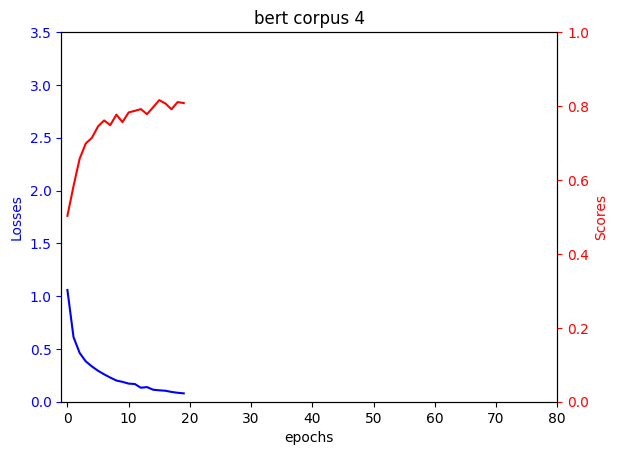

In [54]:
plot_training("bert_corpus4", "bert corpus 4")

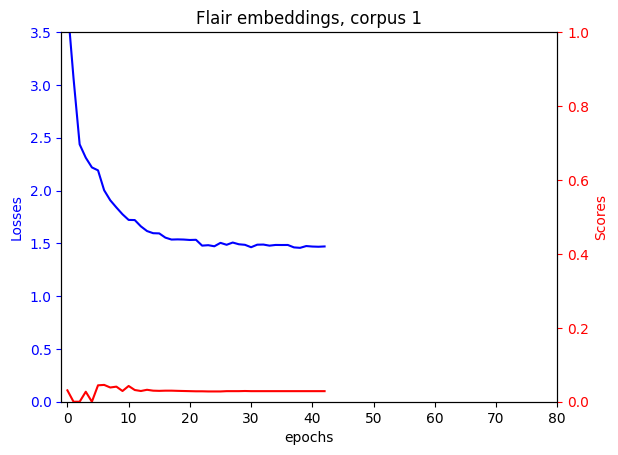

In [49]:
plot_training("corpus1","Flair embeddings, corpus 1")

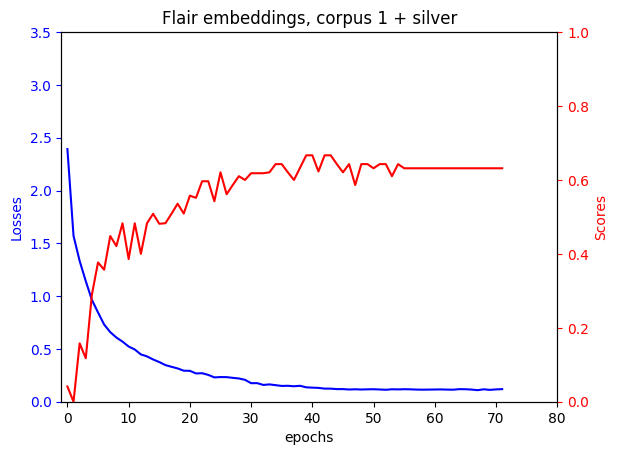

In [50]:
plot_training('corpus1_silver', "Flair embeddings, corpus 1 + silver")

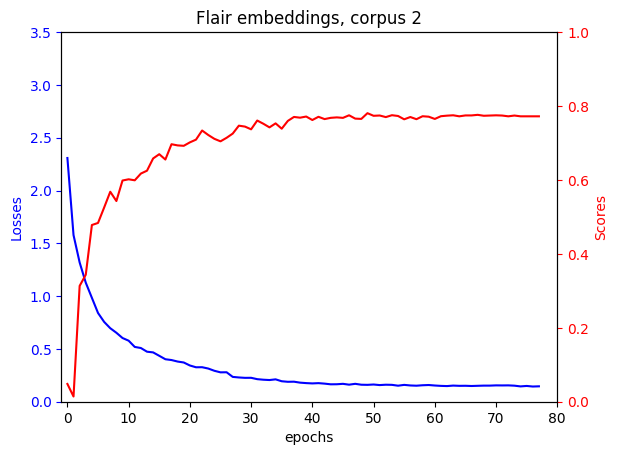

In [51]:
plot_training("corpus2", "Flair embeddings, corpus 2")

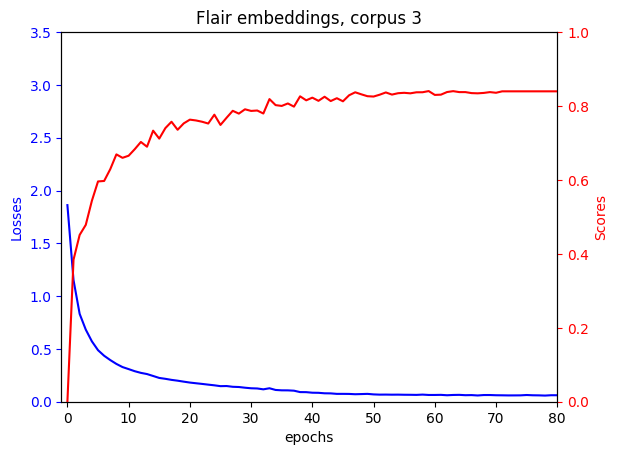

In [52]:
plot_training("corpus3","Flair embeddings, corpus 3")

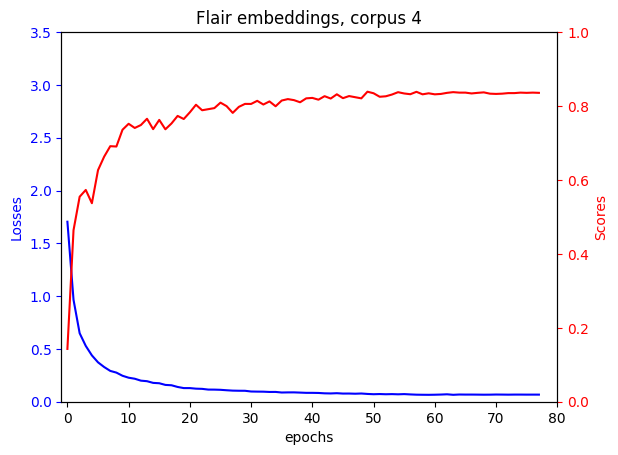

In [53]:
plot_training("corpus4", "Flair embeddings, corpus 4")

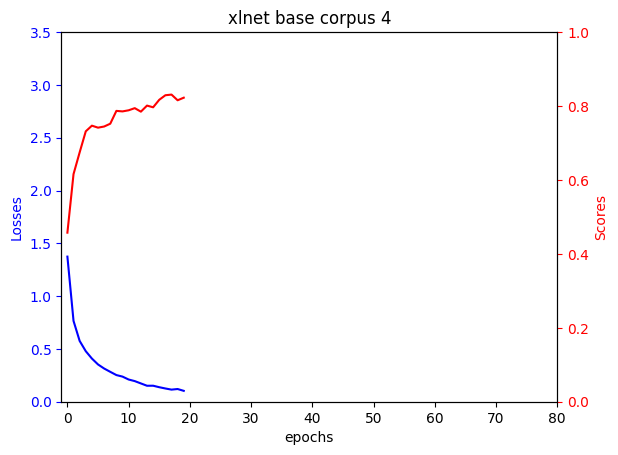

In [55]:
plot_training("xlnet_base_corpus4", "xlnet base corpus 4")

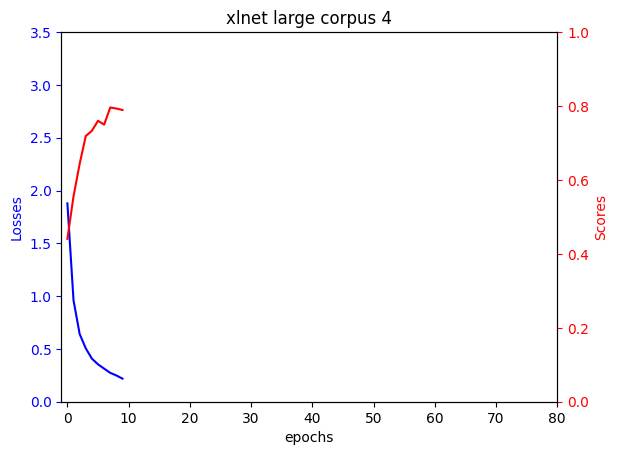

In [92]:
plot_training("xlnet_corpus4", "xlnet large corpus 4")

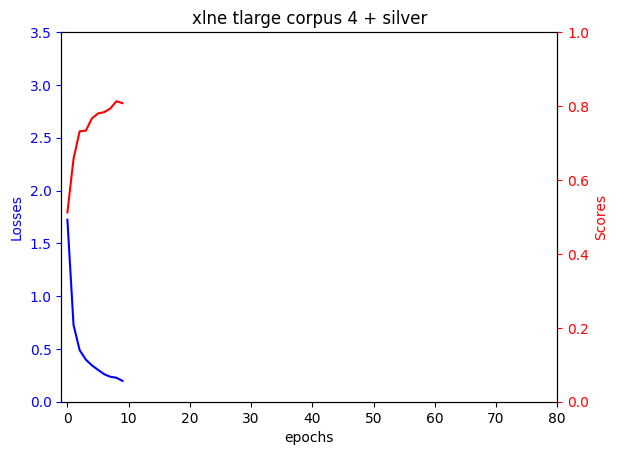

In [93]:
plot_training("xlnet_corpus4_silver", "xlne tlarge corpus 4 + silver")

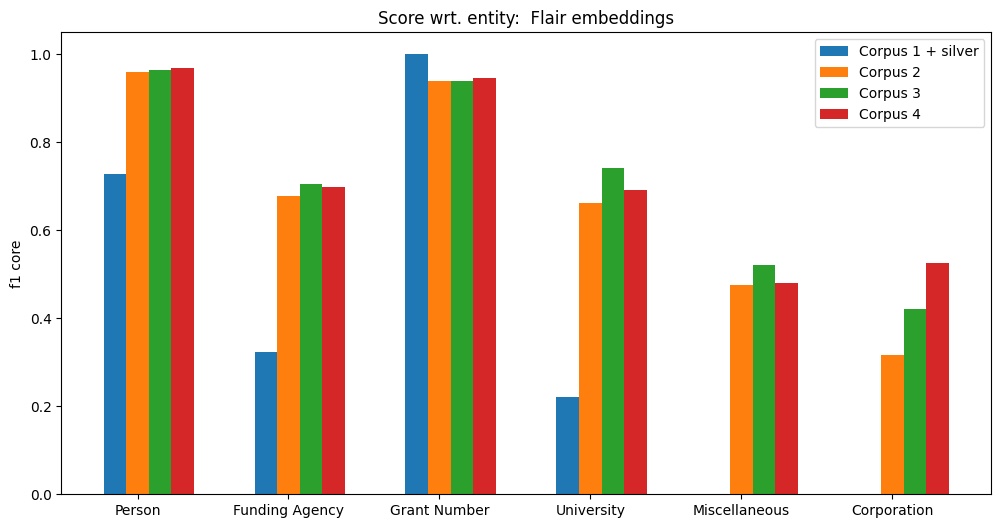

In [60]:
import numpy as np

scores = {
    'Person':         [0.7273, 0.9596, 0.9646, 0.9696],
    'Funding Agency': [0.3243, 0.6784, 0.7062, 0.6989],
    'Grant Number':   [1.0000, 0.9398, 0.9390, 0.9451],
    'University':     [0.2222, 0.6630, 0.7419, 0.6919],
    'Miscellaneous':  [0, 0.4762, 0.5217, 0.4793],
    'Corporation':    [0, 0.3158, 0.4211, 0.5263]
} 

entities = list(scores.keys())
corpora = ['Corpus 1 + silver', 'Corpus 2', 'Corpus 3', 'Corpus 4']
bar_width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, corpus in enumerate(corpora):
    positions = np.arange(len(entities)) + i * bar_width
    scores_values = [scores[entity][i] for entity in entities]
    ax.bar(positions, scores_values, bar_width, label=corpus)

ax.set_xticks(np.arange(len(entities)) + bar_width)
ax.set_xticklabels(entities)
ax.set_ylabel('f1 core')
ax.set_title('Score wrt. entity:  Flair embeddings')
ax.legend()

plt.show()

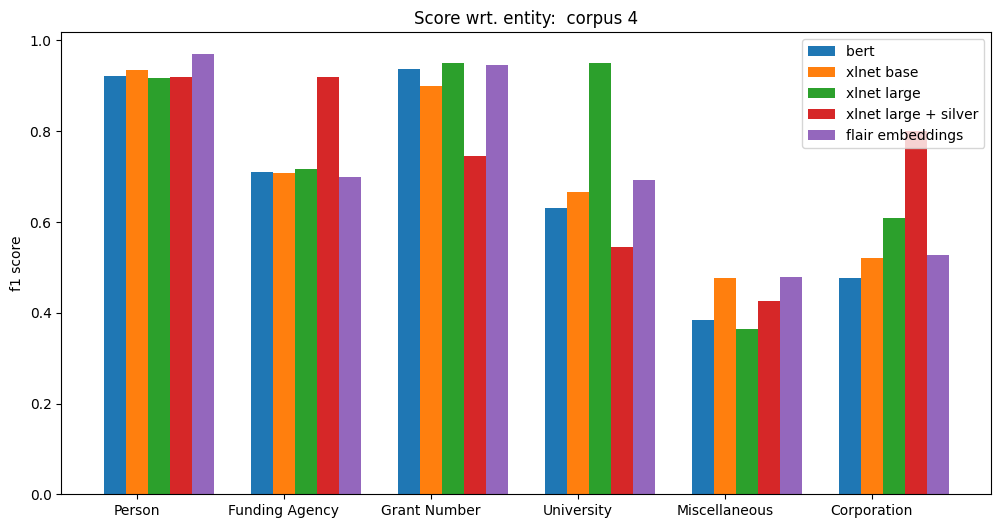

In [98]:
import numpy as np

scores = {
    'Person':         [0.9208, 0.9342, 0.9165, 0.9193, 0.9696],
    'Funding Agency': [0.7099, 0.7089, 0.7168, 0.9189,  0.6989],
    'Grant Number':   [0.9362, 0.9000, 0.9509, 0.7455 ,  0.9451],
    'University':     [0.6316, 0.6667, 0.9509, 0.5455,  0.6919],
    'Miscellaneous':  [0.3846, 0.4756, 0.3647, 0.4267,  0.4793],
    'Corporation':    [0.4762, 0.5217, 0.6087, 0.800,  0.5263]
}

entities = list(scores.keys())
corpora = ['bert ', 'xlnet base ', 'xlnet large ', 'xlnet large + silver', 'flair embeddings']
bar_width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, corpus in enumerate(corpora):
    positions = np.arange(len(entities)) + i * bar_width
    scores_values = [scores[entity][i] for entity in entities]
    ax.bar(positions, scores_values, bar_width, label=corpus)

ax.set_xticks(np.arange(len(entities)) + bar_width)
ax.set_xticklabels(entities)
ax.set_ylabel('f1 score')
ax.set_title('Score wrt. entity:  corpus 4')
ax.legend()

plt.show()

In [62]:
def plot_silvercorpora_vs_corpora(corpora_out,silver_out, title= ''):

    losses = []
    losses_silver = []
    scores = []
    scores_silver = []

    with open(f'training_outputs/{corpora_out}','r') as f:
        lines = f.readlines()
    for line in lines:
        if line.count('EPOCH') == 1:
            losses.append(float(line.split(' ')[6]))
        if line.count('DEV') == 1:
            scores.append(float(line.split(' ')[11]))
    with open(f'training_outputs/{silver_out}','r') as f:
        lines = f.readlines()
    for line in lines:
        if line.count('EPOCH') == 1:
            losses_silver.append(float(line.split(' ')[6]))
        if line.count('DEV') == 1:
            scores_silver.append(float(line.split(' ')[11]))

    fig, ax1 = plt.subplots()

    ax1.plot(range(0, len(losses)), losses, color='skyblue', label='Losses (w/o silver)')
    ax1.plot(range(0, len(losses_silver)), losses_silver, color='b', label='Losses (+ silver)')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('Losses', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_xlim([-1,11])
    ax1.set_ylim([0, max(max(losses),max(losses_silver))+0.2])
    plt.legend(loc='lower left')

    ax2 = ax1.twinx()
    ax2.plot(range(0, len(scores)), scores, color='#FF7F7F', label='Scores (w/o silver)')
    ax2.plot(range(0, len(scores_silver)), scores_silver, color='r', label='Scores (+ silver)')
    ax2.set_ylabel('Scores', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim([0, 1])

    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

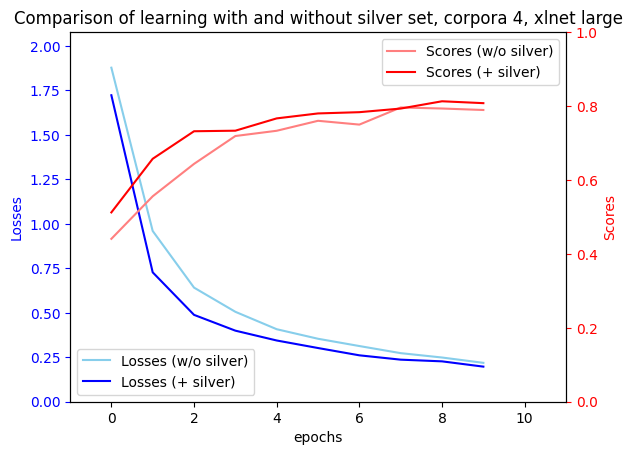

In [96]:
plot_silvercorpora_vs_corpora("xlnet_corpus4_output.txt","xlnet_corpus4_silver_output.txt", title= "Comparison of learning with and without silver set, corpora 4, xlnet large")

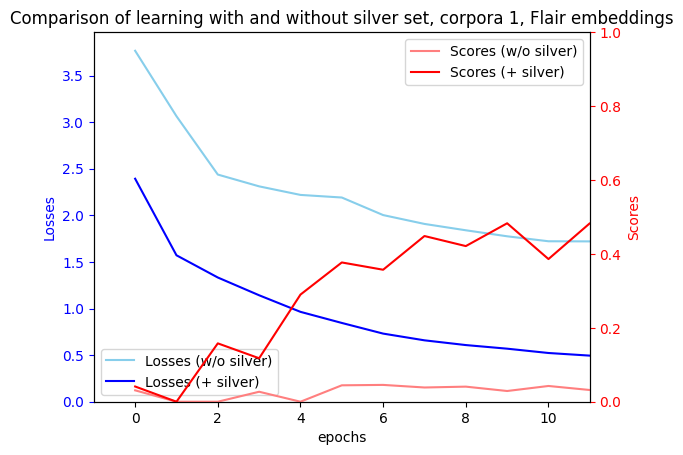

In [64]:
plot_silvercorpora_vs_corpora("corpus1_output.txt","corpus1_silver_output.txt", title= "Comparison of learning with and without silver set, corpora 1, Flair embeddings")

In [90]:
import matplotlib.pyplot as plt

def get_scores_and_losses(file_out):
    losses = []
    scores = []
    with open(f'training_outputs/{file_out}','r') as f:
        lines = f.readlines()
    for line in lines:
        if line.count('EPOCH') == 1:
            losses.append(float(line.split(' ')[6]))
        if line.count('DEV') == 1:
            scores.append(float(line.split(' ')[11]))
            
    return losses, scores      





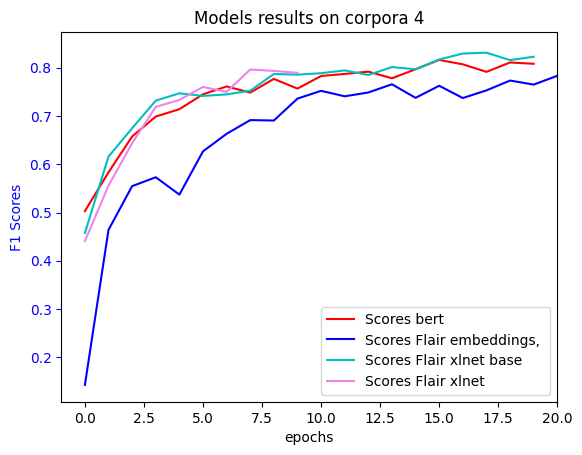

In [91]:
fig, ax1 = plt.subplots()

losses, scores = get_scores_and_losses('bert_corpus4_output.txt')
ax1.plot(range(0, len(scores)), scores, color='r', label=' bert')


losses, scores = get_scores_and_losses('corpus4_output.txt')
ax1.plot(range(0, len(scores)), scores, color='b', label=' Flair embeddings, ')


losses, scores = get_scores_and_losses('xlnet_base_corpus4_output.txt')
ax1.plot(range(0, len(scores)), scores, color='c', label=' Flair xlnet base ')


losses, scores = get_scores_and_losses('xlnet_corpus4_output.txt')
ax1.plot(range(0, len(scores)), scores, color='violet', label=' Flair xlnet large')


ax1.set_xlabel('epochs')
ax1.set_ylabel('F1 Scores', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xlim([-1,20])
plt.legend(loc='lower right')
plt.title("Models results on corpora 4")
plt.show()

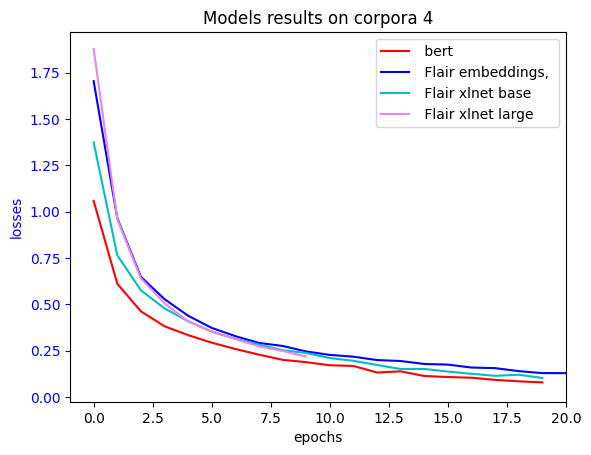

In [97]:
fig, ax1 = plt.subplots()

losses, scores = get_scores_and_losses('bert_corpus4_output.txt')
ax1.plot(range(0, len(scores)), losses, color='r', label=' bert')


losses, scores = get_scores_and_losses('corpus4_output.txt')
ax1.plot(range(0, len(scores)), losses, color='b', label=' Flair embeddings, ')


losses, scores = get_scores_and_losses('xlnet_base_corpus4_output.txt')
ax1.plot(range(0, len(scores)), losses, color='c', label=' Flair xlnet base ')


losses, scores = get_scores_and_losses('xlnet_corpus4_output.txt')
ax1.plot(range(0, len(scores)), losses, color='violet', label=' Flair xlnet large')


ax1.set_xlabel('epochs')
ax1.set_ylabel('losses', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xlim([-1,20])
plt.legend(loc='upper right')
plt.title("Models results on corpora 4")
plt.show()